# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations

- Max Temp was the best variable in comparing the Northern and Souther Hemisphere, due to a better r squared value and the plot.
- The Southern Hemisphere overall showed higher results across all the data points.
- Introducing a prediction interval would have been a better way to distinguish the data for the Linear regression plots since most of the r squared values were very low, except for Max Temp.

In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = "imperial"

cld = []
cty = []
dte = []
hum = []
log = []
lat = []
mxs = []
win = []
city_name = []
num = 0
set_data = 1

print(f"Beginning Data Retrieval")

for city in cities:
    query_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(query_url).json()

    try:
        num += 1
        print(f"Processing Record {num} of Set {set_data} | {city}")
        city_name.append(response["name"])
        cld.append(response["clouds"]["all"])
        cty.append(response["sys"]["country"])
        dte.append(response["dt"])
        hum.append(response["main"]["humidity"])
        log.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        mxs.append(response["main"]["temp_max"])
        win.append(response["wind"]["speed"]) 
 
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        time.sleep(1)
        pass
    if num == 50: 
        set_data += 1
        num = 0
print(f"------------------------------")
print(f"Data Retrieval Complete")
print(f"------------------------------")

Beginning Data Retrieval
Processing Record 1 of Set 1 | angoche
Processing Record 2 of Set 1 | beyneu
Processing Record 3 of Set 1 | hombourg-haut
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | mitchell
Processing Record 7 of Set 1 | dunedin
Processing Record 8 of Set 1 | mnogovershinnyy
Processing Record 9 of Set 1 | emerald
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | satitoa
City not found. Skipping...
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | aranda de duero
Processing Record 15 of Set 1 | oranjemund
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | qaqortoq
Processing Record 18 of Set 1 | kadykchan
City not found. Skipping...
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | saleaula
City not found. Skipping...
Processing Record 21 of Set 1 | flin flon
Processing Record 22 of Set 1 | ma

Processing Record 35 of Set 4 | bredasdorp
Processing Record 36 of Set 4 | ryomgard
Processing Record 37 of Set 4 | alofi
Processing Record 38 of Set 4 | barbar
City not found. Skipping...
Processing Record 39 of Set 4 | kahului
Processing Record 40 of Set 4 | kipushi
Processing Record 41 of Set 4 | izhma
Processing Record 42 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 43 of Set 4 | barao de melgaco
Processing Record 44 of Set 4 | severo-kurilsk
Processing Record 45 of Set 4 | karaul
City not found. Skipping...
Processing Record 46 of Set 4 | lamar
Processing Record 47 of Set 4 | cape town
Processing Record 48 of Set 4 | rustenburg
Processing Record 49 of Set 4 | igarka
Processing Record 50 of Set 4 | touros
Processing Record 1 of Set 5 | san carlos de bariloche
Processing Record 2 of Set 5 | pangnirtung
Processing Record 3 of Set 5 | cilegon
Processing Record 4 of Set 5 | kiunga
Processing Record 5 of Set 5 | lavrentiya
Processing Record 6 of Set 5 | ondorhaan
Ci

Processing Record 28 of Set 8 | tuy hoa
Processing Record 29 of Set 8 | hopelchen
Processing Record 30 of Set 8 | tautira
Processing Record 31 of Set 8 | mufumbwe
Processing Record 32 of Set 8 | menongue
Processing Record 33 of Set 8 | catuday
Processing Record 34 of Set 8 | hit
Processing Record 35 of Set 8 | santo antonio do ica
Processing Record 36 of Set 8 | richards bay
Processing Record 37 of Set 8 | narsaq
Processing Record 38 of Set 8 | mangaratiba
Processing Record 39 of Set 8 | kununurra
Processing Record 40 of Set 8 | saint-denis
Processing Record 41 of Set 8 | talaya
Processing Record 42 of Set 8 | sao felix do xingu
Processing Record 43 of Set 8 | taos
Processing Record 44 of Set 8 | qianan
Processing Record 45 of Set 8 | port augusta
Processing Record 46 of Set 8 | avera
Processing Record 47 of Set 8 | esperance
Processing Record 48 of Set 8 | kaputa
Processing Record 49 of Set 8 | urumqi
Processing Record 50 of Set 8 | kholm
Processing Record 1 of Set 9 | khandyga
Proces

Processing Record 18 of Set 12 | nikolsk
Processing Record 19 of Set 12 | ust-maya
Processing Record 20 of Set 12 | verkhoyansk
Processing Record 21 of Set 12 | carballo
Processing Record 22 of Set 12 | coihueco
Processing Record 23 of Set 12 | mirnyy
Processing Record 24 of Set 12 | bukama
Processing Record 25 of Set 12 | west wendover
Processing Record 26 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 27 of Set 12 | kirkwall
Processing Record 28 of Set 12 | fort dodge
Processing Record 29 of Set 12 | am timan
Processing Record 30 of Set 12 | broken hill
Processing Record 31 of Set 12 | katobu
Processing Record 32 of Set 12 | awbari
Processing Record 33 of Set 12 | zhangye
Processing Record 34 of Set 12 | gazimurskiy zavod
Processing Record 35 of Set 12 | harper
Processing Record 36 of Set 12 | nador
Processing Record 37 of Set 12 | sulangan
Processing Record 38 of Set 12 | sakakah
Processing Record 39 of Set 12 | velingara
Processing Record 40 of Set 12 | sid

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [85]:
#Display the DataFrame
city_df = pd.DataFrame({"City": city_name,
                        "Lat": lat,
                        "Lng": log,
                        "Max_Temp": mxs,
                        "Humidity": hum,
                        "Cloudiness": cld,
                        "Wind_Speed": win,
                        "Country": cty,
                        "Date": dte})
city_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Angoche,-16.23,39.91,69.75,79,27,9.40,MZ,1594674273
1,Beyneu,45.32,55.20,88.59,21,17,11.83,KZ,1594674242
2,Hombourg-Haut,49.12,6.77,64.99,48,83,3.36,FR,1594674371
3,Hobart,-42.88,147.33,42.80,87,75,4.70,AU,1594674016
4,Atuona,-9.80,-139.03,79.54,77,24,19.35,PF,1594673992


In [86]:
city_df.count()


City          568
Lat           568
Lng           568
Max_Temp      568
Humidity      568
Cloudiness    568
Wind_Speed    568
Country       568
Date          568
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [87]:
# NOTE: No cities over 100% humidity (skipping)
city_df.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,20.165757,22.243433,69.258239,71.172535,48.794014,7.750123,1.594674e+09
std,33.162729,89.245620,14.821129,20.402696,38.553815,5.465356,1.872030e+02
min,-54.800000,-175.200000,30.200000,9.000000,0.000000,0.250000,1.594674e+09
25%,-7.737500,-53.310000,57.200000,58.750000,6.000000,3.652500,1.594674e+09
50%,23.505000,26.395000,71.305000,76.000000,41.000000,6.610000,1.594674e+09
75%,48.037500,100.765000,79.472500,87.000000,90.000000,10.992500,1.594675e+09
max,78.220000,179.320000,108.000000,100.000000,100.000000,35.570000,1.594675e+09


In [88]:
#  Get the indices of cities that have humidity over 100%.


In [89]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Extract relevant fields from the data frame




In [102]:
#Export ther city data into a .csv
city_df.to_csv("../output_data/cities.csv", encoding="utf-8", index=False)
city_df.head()


,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Angoche,-16.23,39.91,69.75,79,27,9.40,MZ,1594674273
1,Beyneu,45.32,55.20,88.59,21,17,11.83,KZ,1594674242
2,Hombourg-Haut,49.12,6.77,64.99,48,83,3.36,FR,1594674371
3,Hobart,-42.88,147.33,42.80,87,75,4.70,AU,1594674016
4,Atuona,-9.80,-139.03,79.54,77,24,19.35,PF,1594673992


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [122]:
# timestamp = time.gmtime(city_df["Date"][0])
# date = time.strftime("%x", timestamp)
# import time
# import datetime
from datetime import datetime
date_data = city_df.iat[0,8]
date_stamp = datetime.fromtimestamp(date_data).strftime("%m/%d/%Y")
date_stamp

'07/13/2020'

## Latitude vs. Temperature Plot

> ### Observation: Latitude vs. Temperature Plot
 - The max temp rises considerable as you move closer to the Equator or 0 degrees of Latitude

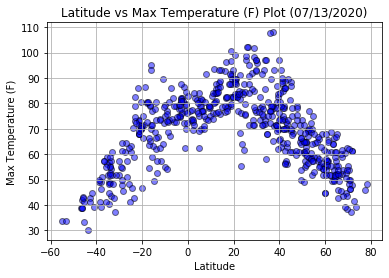

In [107]:
#Plotting data for Temperature
plt.scatter(city_df["Lat"],city_df["Max_Temp"], marker="o", facecolors="blue", edgecolors="black",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Latitude vs Max Temperature (F) Plot ({date_stamp})")
plt.savefig("../output_data//Latitude vs. Max Temperature Plot.png")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

> ### Observation: Latitude vs. Humidity Plot
 - Humidity at 0 degrees of Latitude tends to have higher humidity, but the Southern hemiphere is higher overall compared to the Northern Heimisphere

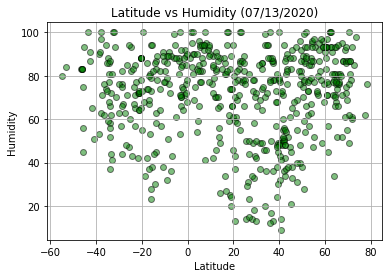

In [108]:
plt.scatter(city_df["Lat"],city_df["Humidity"], marker="o", facecolors="green", edgecolors="black",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude vs Humidity ({date_stamp})")
plt.savefig("../output_data//Latitude vs. Humidity Plot.png")
plt.grid()
plt.show()


## Latitude vs. Cloudiness Plot

> ### Observation: Latitude vs. Cloudiness
 - Cloudiness looks to be very speratic at first glance, and there is a large variance between the lower and higher bounds of the data, especially as you move towards the Southern hemiphere.

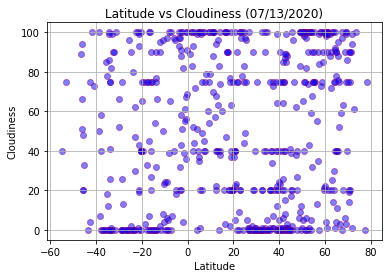

In [109]:
plt.scatter(city_df["Lat"],city_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="purple",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Latitude vs Cloudiness ({date_stamp})")
plt.savefig("../output_data//Latitude vs. Cloudiness Plot.png")
plt.grid()
plt.show()


## Latitude vs. Wind Speed Plot

> ### Observation: Latitude vs. Wind Speed 
 - Higer Wind Speeds are more highly concentrated from the Equator towards the Southern hemiphere, but the largest outlier is in the Norther Hemisphere. 

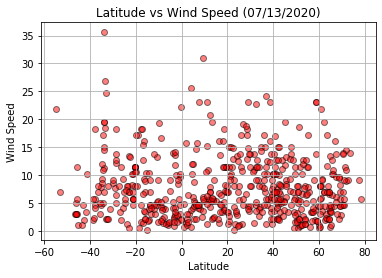

In [110]:
plt.scatter(city_df["Lat"],city_df["Wind_Speed"], marker="o", facecolors="red", edgecolors="black",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Latitude vs Wind Speed ({date_stamp})")
plt.savefig("../output_data//Latitude vs. Wind Speed Plot.png")
plt.grid()
plt.show()


## Linear Regression

In [111]:
# OPTIONAL: Create a function to create Linear Regression plots


In [112]:
# Create Northern and Southern Hemisphere DataFrames
city_weather_load = "../output_data/cities.csv"
city_weather_df = pd.read_csv(city_weather_load)
city_weather_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Angoche,-16.23,39.91,69.75,79,27,9.40,MZ,1594674273
1,Beyneu,45.32,55.20,88.59,21,17,11.83,KZ,1594674242
2,Hombourg-Haut,49.12,6.77,64.99,48,83,3.36,FR,1594674371
3,Hobart,-42.88,147.33,42.80,87,75,4.70,AU,1594674016
4,Atuona,-9.80,-139.03,79.54,77,24,19.35,PF,1594673992


In [113]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = city_weather_df.loc[city_weather_df["Lat"] >= 0]
north_hem.reset_index(inplace=True)

south_hem = city_weather_df.loc[city_weather_df["Lat"] < 0]
south_hem.reset_index(inplace=True)


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5071130284613558


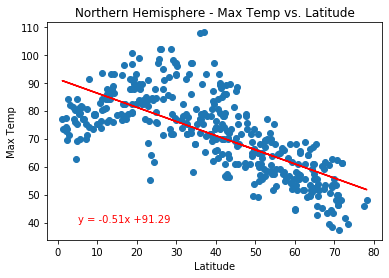

In [114]:
x_value = north_hem["Lat"]
y_value = north_hem["Max_Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(5, 40),color="red")
plt.plot(x_value,regression_values, "r-")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../output_data//Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

> ### Observation: Northern vs. Southern Hemisphere - Max Temp vs. Latitude Linear Regression
 - The Max Temp r squared value is higher for the Southern Hemipshere regression, showing a better fit to the slope. 

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6550879838569885


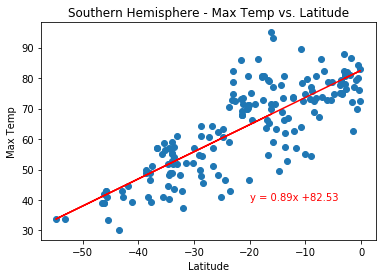

In [115]:
x_value = south_hem["Lat"]
y_value = south_hem["Max_Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(-20,40),color="red")
plt.plot(x_value,regression_values, "r-")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../output_data//Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00420862968865709


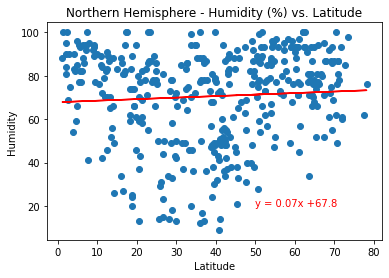

In [116]:
x_value = north_hem["Lat"]
y_value = north_hem["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(50, 20),color="red")
plt.plot(x_value,regression_values, "r-")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../output_data//Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

> ### Observation: Northern vs. Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
 - The r squared value is too low for both Northern and Southern Hemipshere regression, adding a prediction interval would help distinguish between the two to the slope, the variation is statically flat to each other. 

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00022080484864802182


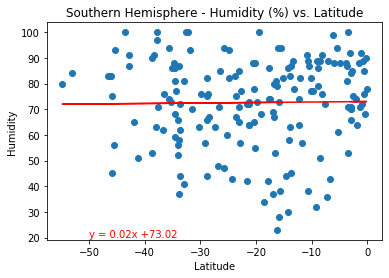

In [117]:
x_value = south_hem["Lat"]
y_value = south_hem["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(-50, 20),color="red")
plt.plot(x_value,regression_values, "r-")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../output_data//Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0007664022756641325


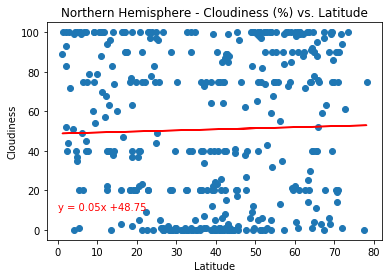

In [118]:
x_value = north_hem["Lat"]
y_value = north_hem["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(0, 10),color="red")
plt.plot(x_value,regression_values, "r-")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data//Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

> ### Observation: Northern vs. Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
 - The r squared value is low for both Northern and Southern Hemipshere regression, but the Southern Hemisphere is higher, showing and increase in Cloudiness as you move from the Equator to the Southern Hemipshere.

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.014223934429706429


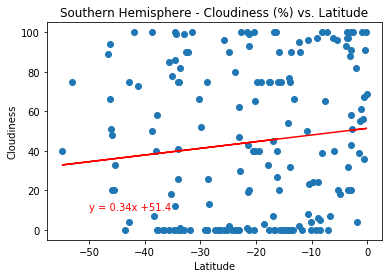

In [119]:
x_value = south_hem["Lat"]
y_value = south_hem["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(-50, 10),color="red")
plt.plot(x_value,regression_values, "r-")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data//Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00248533442477179


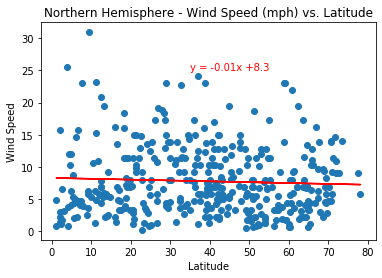

In [120]:
x_value = north_hem["Lat"]
y_value = north_hem["Wind_Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(35, 25),color="red")
plt.plot(x_value,regression_values, "r-")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../output_data//Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

> ### Observation: Northern vs. Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
 - The r squared value is low for both Northern and Southern Hemipshere regression, but the Southern Hemisphere is higher, but still too low.

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023900428506668993


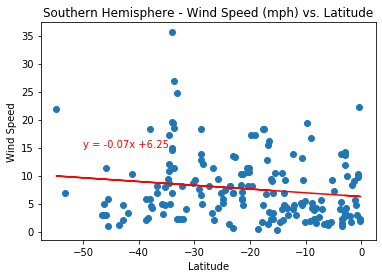

In [121]:
x_value = south_hem["Lat"]
y_value = south_hem["Wind_Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(-50, 15),color="red")
plt.plot(x_value,regression_values, "r-")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../output_data//Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()